# Vessels - AIS Data


In this notebook, we show how to retrieve and analyse information from AIS messages.

We take the following steps:

 1. [Imports](#1.-Imports)
 2. [Load and read the Data](#2.-Load-and-read-the-data)
 3. [Create a list of vessels](#3.-Create-a-list-of-vessels)

# 1. Imports

In [14]:
# package(s) used for creating and geo-locating the graph
import networkx as nx  
import shapely.geometry
import pyproj

# package(s) related to the simulation (creating the vessel, running the simulation)
import datetime, time
import simpy
import opentnsim
from opentnsim import core

# package(s) needed for data handling and inspecting output
import numpy as np
import pathlib
import os
import pandas as pd
import geopandas as gpd
#import movingpandas still gives error

# package(s) needed for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

print('This notebook is executed with OpenTNSim version {}'.format(opentnsim.__version__))

This notebook is executed with OpenTNSim version 1.0.0


# 2. Load and read the data

For this example we'll use a representative AIS data file called "ais.csv". Make sure to have this file in a known (and convenient) directory. We'll use the combination of pandas, geopandas and movingpandas to read the data.
Pandas reads the data as a table. Geopandas adds the location and movingpandas adds the time information. 
The result is that we can use data as table, feature (geospatial) and trajectory (moving objects). 

In [2]:
import pathlib
import os
import pandas as pd
import geopandas as gpd
#import movingpandas 

In [3]:
#Check in which Current Working Directory you are working
os.getcwd()

'C:\\Users\\maxva\\Desktop\\TU\\TA Work\\OpenTNSim\\GitHub\\notebooks'

In [4]:
#Determine where your data file is and create the directory

data_dir = pathlib.Path('../data')

In [5]:
ais_df = pd.read_csv(data_dir / 'ais.csv')
ais_df['geometry'] = ais_df.apply(lambda x: shapely.geometry.Point(x['LON'], x['LAT']), axis=1)

# 3. Create a list of vessels



Instead of creating a vessel class, it is also possible to create a list of vessels from AIS-data. The data from the 'ais.csv'-file can be filtered by multiple different criteria. For this example we will filter by a certain terminal type.

In [10]:
# Select vessels that go to certain ports. In this case, the vessels that go to the 'Other' terminals are removed from the list.

vessels = ais_df.query('terminal != "Other"')
vessels[['name', 'geometry', 'vessel_type', 'terminal', 'length']].head(n=10)

,name,geometry,vessel_type,terminal,length
0,ALFA BALTICA,POINT (3.585885 52.19487),Crude Oil Tanker,Liquid,228.0
1,DAYTONA,POINT (3.809318 52.06665),Crude Oil Tanker,Liquid,248.0
2,ST PAUL,POINT (3.585517 52.05602),Bulk Carrier,Bulk,189.0
3,GEORGY MASLOV,POINT (3.562725 52.1756),Crude Oil Tanker,Liquid,249.0
4,SYDNEY SPIRIT,POINT (3.682493 52.20705),Crude Oil Tanker,Liquid,274.0
5,LOTUS A,POINT (3.621987 52.19629),Container,Container1,335.0
6,ASTER ALVAR,POINT (3.686642 52.13476),Oil/Chemical Tanker,Liquid,129.0
7,NAVIG8 ANDESINE,POINT (3.710833 52.19441),Oil/Chemical Tanker,Liquid,184.0
8,SEAVOYAGER,POINT (3.593533 52.17705),Crude Oil Tanker,Liquid,274.0
9,CORAL LACERA,POINT (3.703472 52.12477),LPG Tanker,Liquid,108.0


## Specific data retrieval

This list of vessels can than be further manipulated to retrieve more specific information. For exmaple, if we want to know the length distribution of vessels arriving at 'Liquid' terminal types, the following visualisation can be done.

,name,geometry,vessel_type,terminal,length,width,DWT
4,SYDNEY SPIRIT,POINT (3.682493 52.20705),Crude Oil Tanker,Liquid,274.0,48.0,158542.0
8,SEAVOYAGER,POINT (3.593533 52.17705),Crude Oil Tanker,Liquid,274.0,48.0,159233.0
3,GEORGY MASLOV,POINT (3.562725 52.1756),Crude Oil Tanker,Liquid,249.0,46.0,122018.0
1,DAYTONA,POINT (3.809318 52.06665),Crude Oil Tanker,Liquid,248.0,43.0,115896.0
0,ALFA BALTICA,POINT (3.585885 52.19487),Crude Oil Tanker,Liquid,228.0,42.0,106373.0
7,NAVIG8 ANDESINE,POINT (3.710833 52.19441),Oil/Chemical Tanker,Liquid,184.0,27.0,37596.0
13,BOCHEM ANTWERP,POINT (3.577317 52.16278),Oil/Chemical Tanker,Liquid,141.0,24.0,19806.0
6,ASTER ALVAR,POINT (3.686642 52.13476),Oil/Chemical Tanker,Liquid,129.0,19.0,11596.0
9,CORAL LACERA,POINT (3.703472 52.12477),LPG Tanker,Liquid,108.0,16.0,4999.0
11,KEY WEST,POINT (3.7321 52.15103),Oil/Chemical Tanker,Liquid,90.0,14.0,3741.0


For terminal type Liquid, maximum ship length = 274.0, minimum = 90.0, mean = 192.5
For terminal type Liquid, maximum ship width = 48.0, minimum = 14.0, mean = 32.7
Average DWT for liquid terminal = 73980.0 tonnes


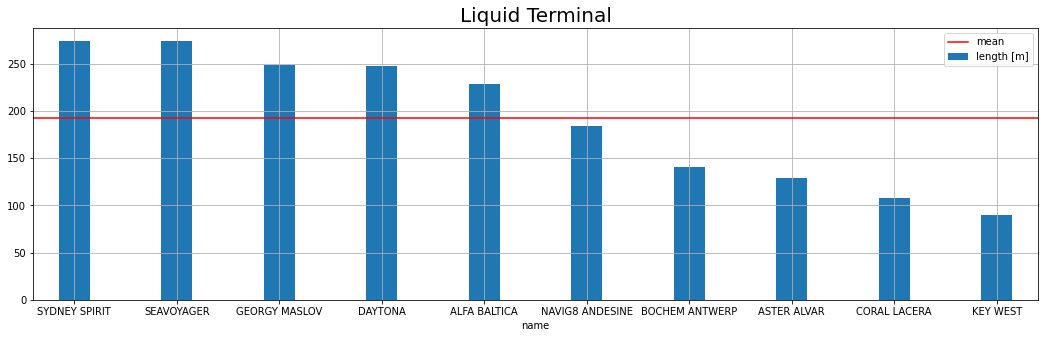

In [11]:
is_liquid =vessels['terminal']=='Liquid'
df_liquid = vessels[is_liquid]

df_liquid= df_liquid.sort_values(by='length',ascending=False)
display(df_liquid[['name', 'geometry', 'vessel_type', 'terminal', 'length', 'width', 'DWT']])
plot= df_liquid.plot.bar(x='name', y='length', rot=0, figsize=(18,5), width = 0.3, grid=(True));
#df_liquid.plot.bar(x= 'name',y = 'width', rot=0, figsize=(18,5), width = 0.3,grid=(True), color='orange');

plot.axhline(y=192.5,color= 'r', label = 'mean')
plot.legend(['mean', 'length [m]'])
plt.title('Liquid Terminal', fontsize = 20)

max_length_liquid = df_liquid['length'].max()
min_length_liquid = df_liquid['length'].min()
mean_length_liquid = df_liquid['length'].mean()
max_width_liquid = df_liquid['width'].max()
min_width_liquid = df_liquid['width'].min()
mean_width_liquid = df_liquid['width'].mean()

# determine average DWT for q3.2
avg_DWT_liquid = df_liquid['DWT'].mean()

print(f'For terminal type Liquid, maximum ship length = {max_length_liquid:.1f}, minimum = {min_length_liquid:.1f}, mean = {mean_length_liquid:.1f}')
print(f'For terminal type Liquid, maximum ship width = {max_width_liquid:.1f}, minimum = {min_width_liquid:.1f}, mean = {mean_width_liquid:.1f}')
print(f'Average DWT for liquid terminal = {avg_DWT_liquid:.1f} tonnes')